# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

### Context 

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

### Objective
The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

* Do the users spend more time on the new landing page than on the existing landing page?
* Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
* Does the converted status depend on the preferred language?
* Is the time spent on the new page the same for the different language users?



## Import all the necessary libraries

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats 


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading the Data into a DataFrame

In [ ]:
# reads the data
data = pd.read_csv('/content/drive/MyDrive/DSBA Program/Business Statistics/Project 2/abtest.csv')

# makes a copy of the data
df = data.copy()

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
# returns the first 5 rows 
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
# returns the last 5 rows 
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


####Observations:

* The dataframe has 6 columns. Data in each row corresponds to the randomly selected users of E-new Express. 
* There are 100 selected users divided into two groups, the control and treatment.

In [ ]:
# checking the shape of the data
df.shape

(100, 6)

####Observations:

* The dataframe has 100 rows and 6 columns. 

In [ ]:
# prints a concise summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


####Observations:

* There are 2 numerical columns in the data and 4 object type columns. One float, one int, and four object. The total memory usage is 4.8+ KB.

In [ ]:
# checking for missing values 
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

####Observations:

* There are no missing values in the data.

In [ ]:
# checking for duplicates 
df.duplicated().sum()

0

####Observations:

* There are no duplicate values in the data.

In [ ]:
# gives statistical summary of numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


####Observations:

* Time Spent on Page: The average time spent on the page is 5.38 minutes. It has a standard deviation of 2.38 minutes. The minimum is 19 seconds and maximum is 10.71 minutes.

In [ ]:
# gives statistical summary of categorical data
df[['group','landing_page','converted','language_preferred']].describe().T

,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,old,50
converted,100,2,yes,54
language_preferred,100,3,Spanish,34


####Observations:

* There are 2 unique values each for group, landing_page, and converted. There is 3 unique values for language_preferred. 

### Univariate Analysis

#### Group

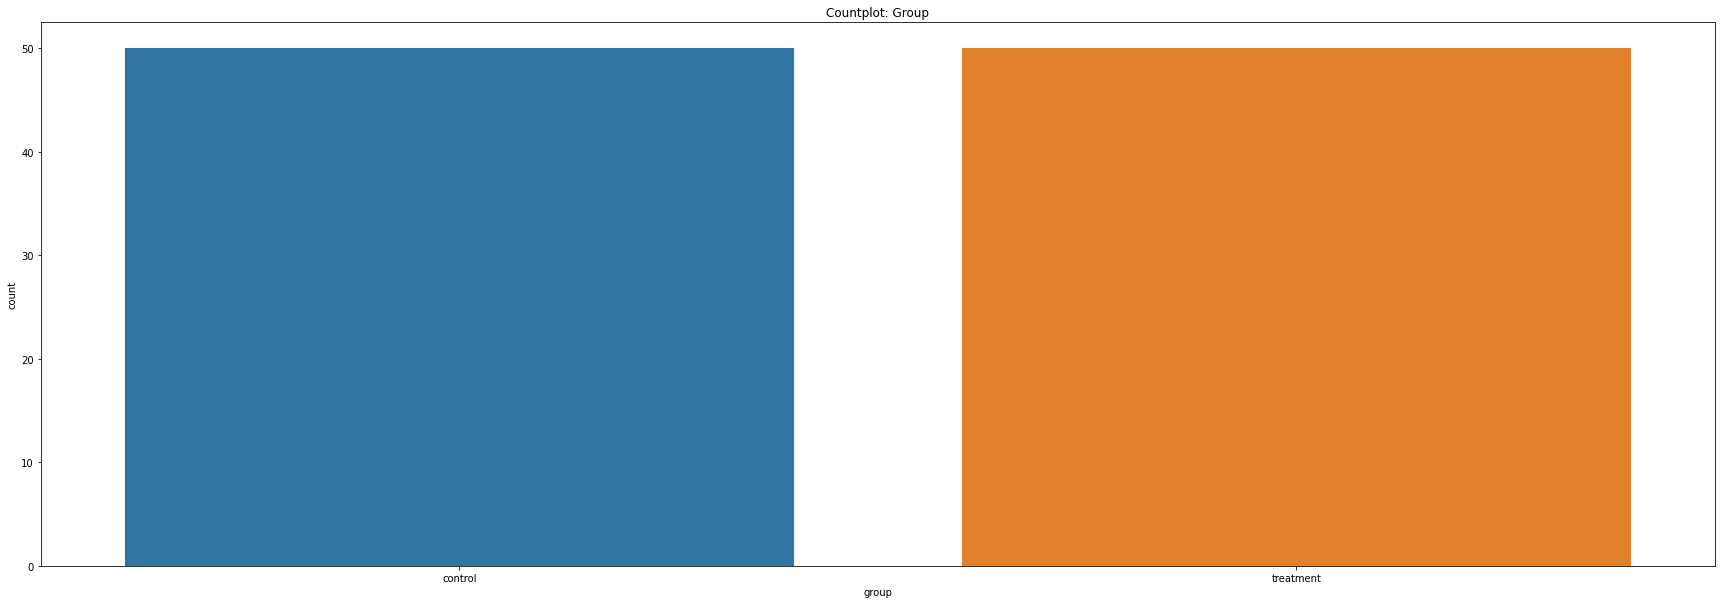

control      50
treatment    50
Name: group, dtype: int64

In [ ]:
# Countplot of Control and Treatment 
plt.figure(figsize=(30,10))
plt.title('Countplot: Group')
plt.xlabel('Group')
sns.countplot(data = df, x = 'group')
plt.show()
df['group'].value_counts()

####Observations:

* There are 50 users in the control group and 50 users in the treatment group.

####Landing Page

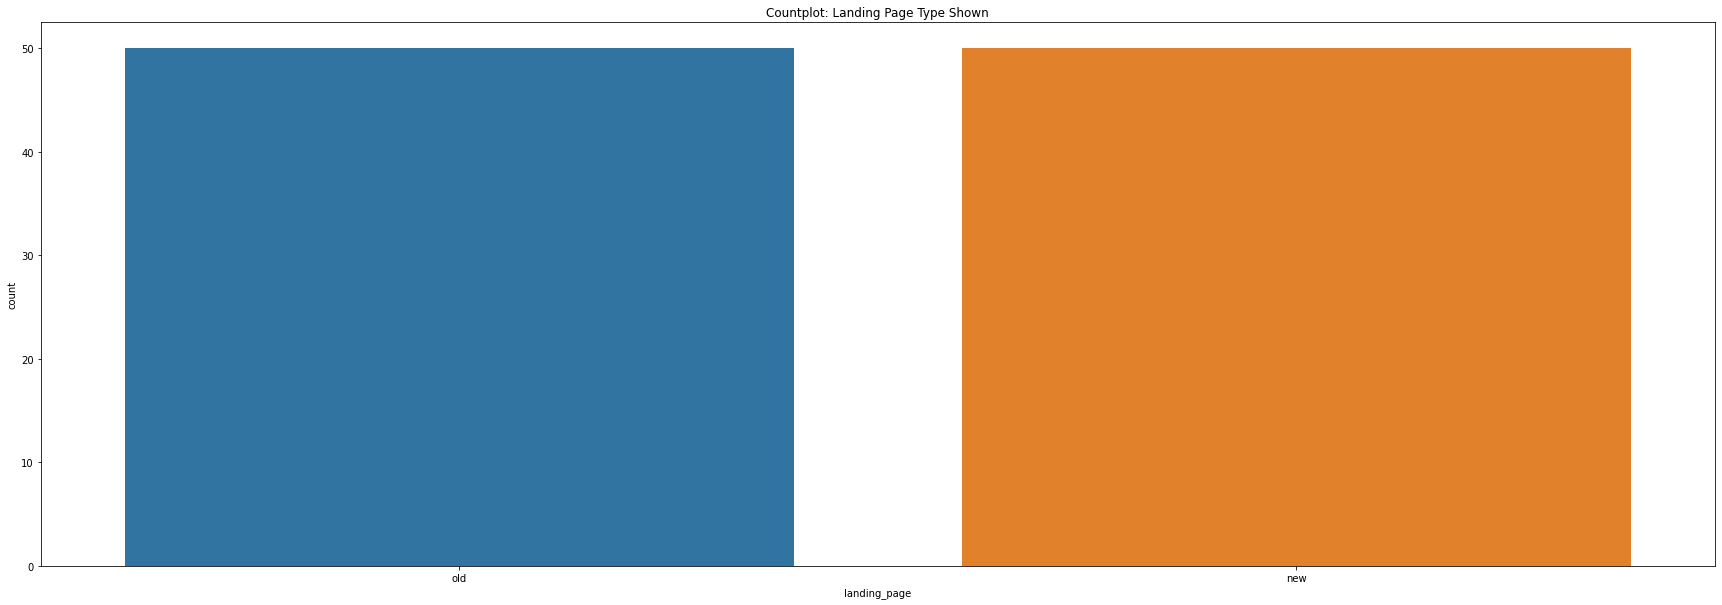

old    50
new    50
Name: landing_page, dtype: int64

In [ ]:
# Countplot of Landing Page
plt.figure(figsize=(30,10))
plt.title('Countplot: Landing Page Type Shown')
plt.xlabel('Landing Page')
sns.countplot(data = df, x = 'landing_page')
plt.show()
df['landing_page'].value_counts()

####Observations:

* 50 users saw the old page in the control group and 50 users in the new page in the treatment group.

####Converted

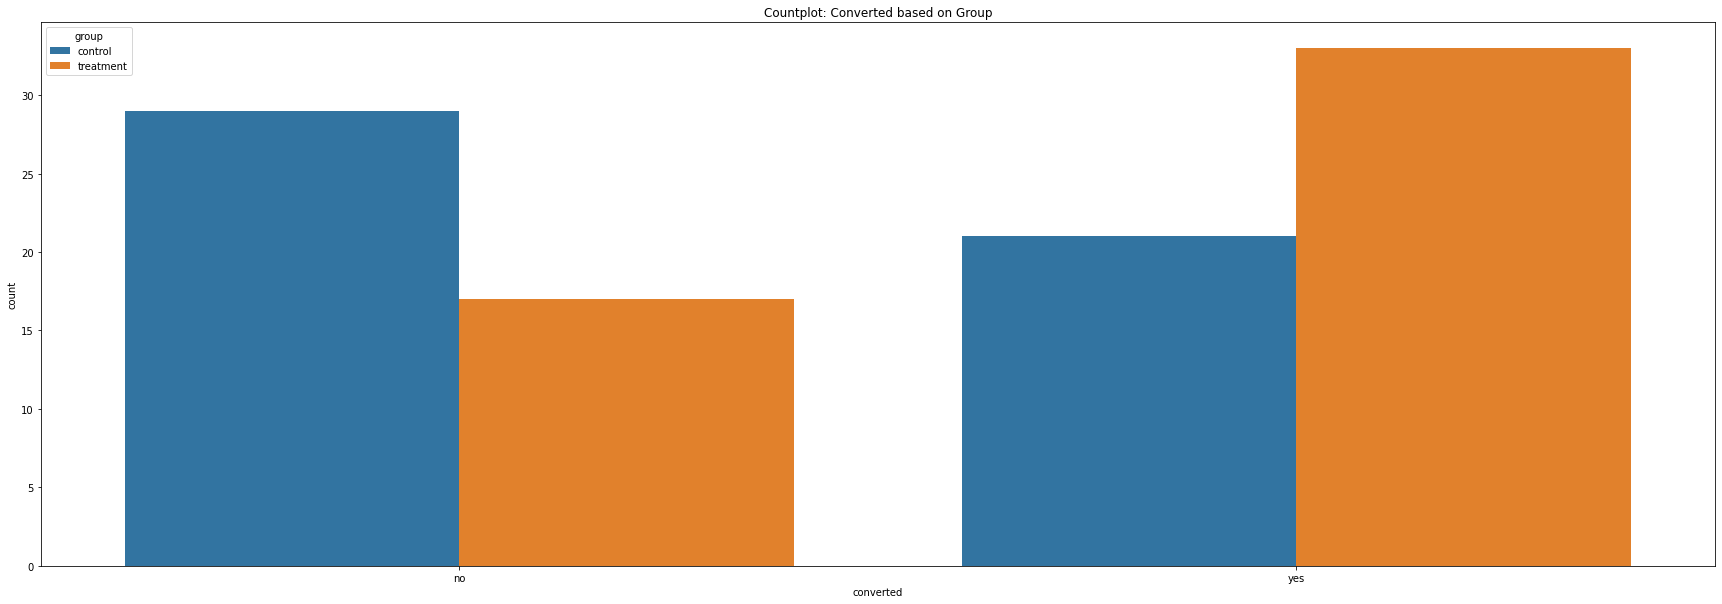

converted
group     converted           
control   no                29
          yes               21
treatment no                17
          yes               33

In [ ]:
# Countplot of those converted based on group 
plt.figure(figsize=(30,10))
plt.title('Countplot: Converted based on Group')
sns.countplot(data = df, x = 'converted', hue ='group')
plt.show()
df.groupby(['group','converted'])[['converted']].count()

####Observations:

* In the treatment group with the new page, there were 33 users who converted into being subscribers whereas 17 did not convert. 
* In the control group with the old page, there were 21 users who converted into being subscribers whereas 29 did not convert. 

####Language Preferred

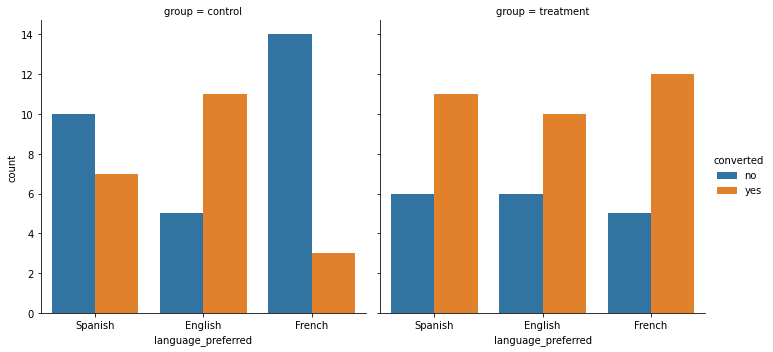

language_preferred
group     language_preferred converted                    
control   English            no                          5
                             yes                        11
          French             no                         14
                             yes                         3
          Spanish            no                         10
                             yes                         7
treatment English            no                          6
                             yes                        10
          French             no                          5
                             yes                        12
          Spanish            no                          6
                             yes                        11

In [ ]:
# Countplot of those with preferred languages converted based on group
sns.catplot(data = df, x = 'language_preferred', hue = 'converted', col = 'group', kind = 'count')
plt.show()
df.groupby(['group','language_preferred', 'converted'])[['language_preferred']].count()

####Observations:

* French and Spanish in the treatment group had 12 and 11 users convert respectively compared to French and Spanish in the control group with 3 and 7 respectively.

### Bivariate Analysis

#### Landing page vs Time spent on the page

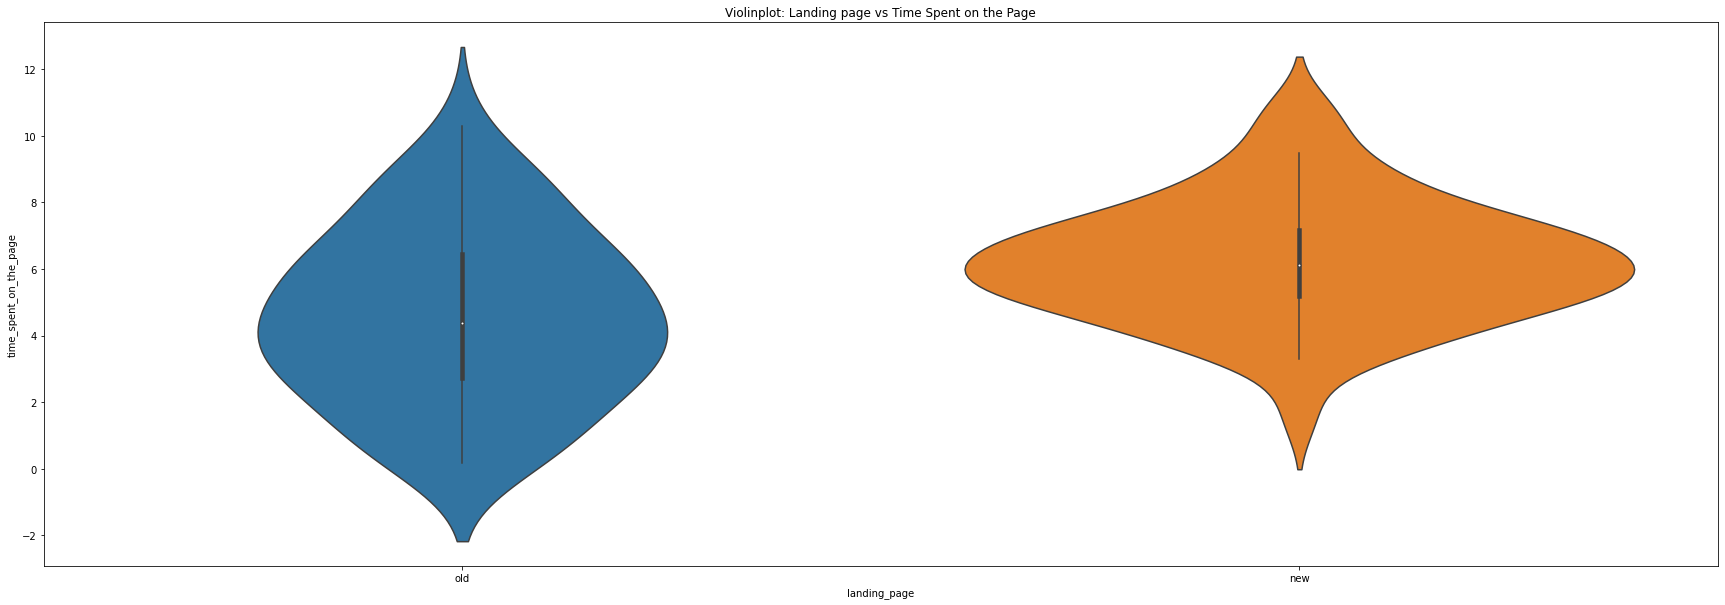

,count,mean,std,min,25%,50%,75%,max
landing_page,,,,,,,,
new,50.0,6.2232,1.817031,1.65,5.175,6.105,7.1600,10.71
old,50.0,4.5324,2.581975,0.19,2.720,4.380,6.4425,10.30


In [ ]:
# Violinplot for Landing page vs Time Spent on the Page
plt.figure(figsize=(30,10))
plt.title('Violinplot: Landing page vs Time Spent on the Page')
plt.ylabel('Frequency')
plt.xticks(np.arange(0,len(df['time_spent_on_the_page']+1),1))
sns.violinplot(data = df, x = 'landing_page', y = 'time_spent_on_the_page')
plt.show()
df.groupby(['landing_page'])['time_spent_on_the_page'].describe()

####Observations:

* The interquartile range for users on the new page is 5.18 minutes to 7.16 minutes. Based on the violin plot for the new page, there is a higher probability that a user will take on a value in that range. 
* The interquartile range for users on the old page is 2.72 minutes to 6.44 minutes. Compared to the new page, visually I see users are spending less time on the old page. This is an interesting observation and I'll be sure to test its significance.

#### Time Spent on the page vs Group

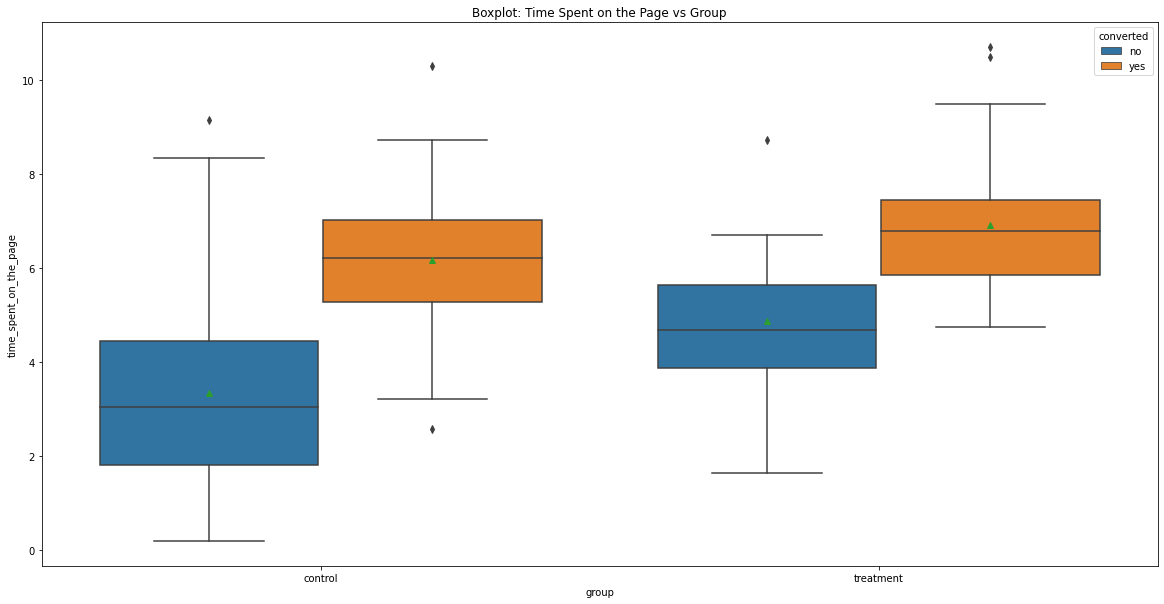

<Figure size 2160x720 with 0 Axes>

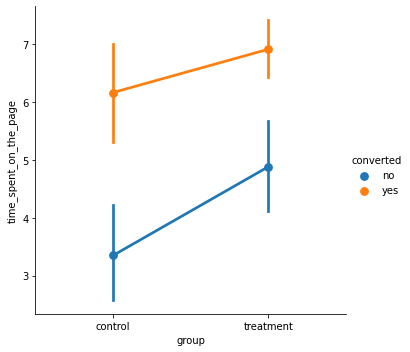

time_spent_on_the_page
group     converted                        
control   no                       3.349310
          yes                      6.166190
treatment no                       4.882353
          yes                      6.913939

In [ ]:
# Boxplot and Catplot for Landing page vs Time Spent on the Page
plt.figure(figsize=(20,10))
plt.title('Boxplot: Time Spent on the Page vs Group')
sns.boxplot(data = df, x = 'group', y = 'time_spent_on_the_page', hue = 'converted', showmeans = True)
plt.show()
plt.figure(figsize=(30,10))
sns.catplot(data = df, x = 'group', y = 'time_spent_on_the_page', hue = 'converted', kind = 'point')
plt.show()
df.groupby(['group','converted'])[['time_spent_on_the_page']].mean()

####Observations:

* Based on the graphs above, those who were converted from both groups on average spent over 6 minutes on the either page. 
* There are some outliers in both groups. The median is higher for users in the treatment group as is expected.

#### Language preferred vs Time spent on the page

<Figure size 2160x720 with 0 Axes>

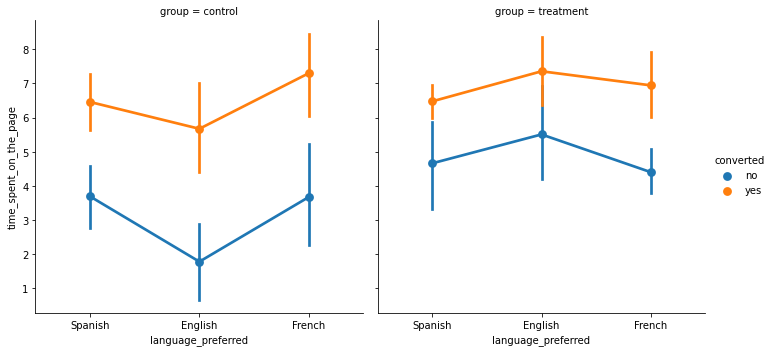

time_spent_on_the_page
group     language_preferred converted                        
control   English            no                       1.776000
                             yes                      5.671818
          French             no                       3.669286
                             yes                      7.300000
          Spanish            no                       3.688000
                             yes                      6.457143
treatment English            no                       5.506667
                             yes                      7.358000
          French             no                       4.400000
                             yes                      6.945000
          Spanish            no                       4.660000
                             yes                      6.476364

In [ ]:
# Catplot for Language preferred vs Time Spent on the Page
plt.figure(figsize=(30,10))
sns.catplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page', col = 'group', hue = 'converted', kind = 'point')
plt.show()
df.groupby(['group','language_preferred','converted'])[['time_spent_on_the_page']].mean()

####Observations:

* English, Spanish, and French all had above 5.5 minutes in both groups if users were converted. 

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

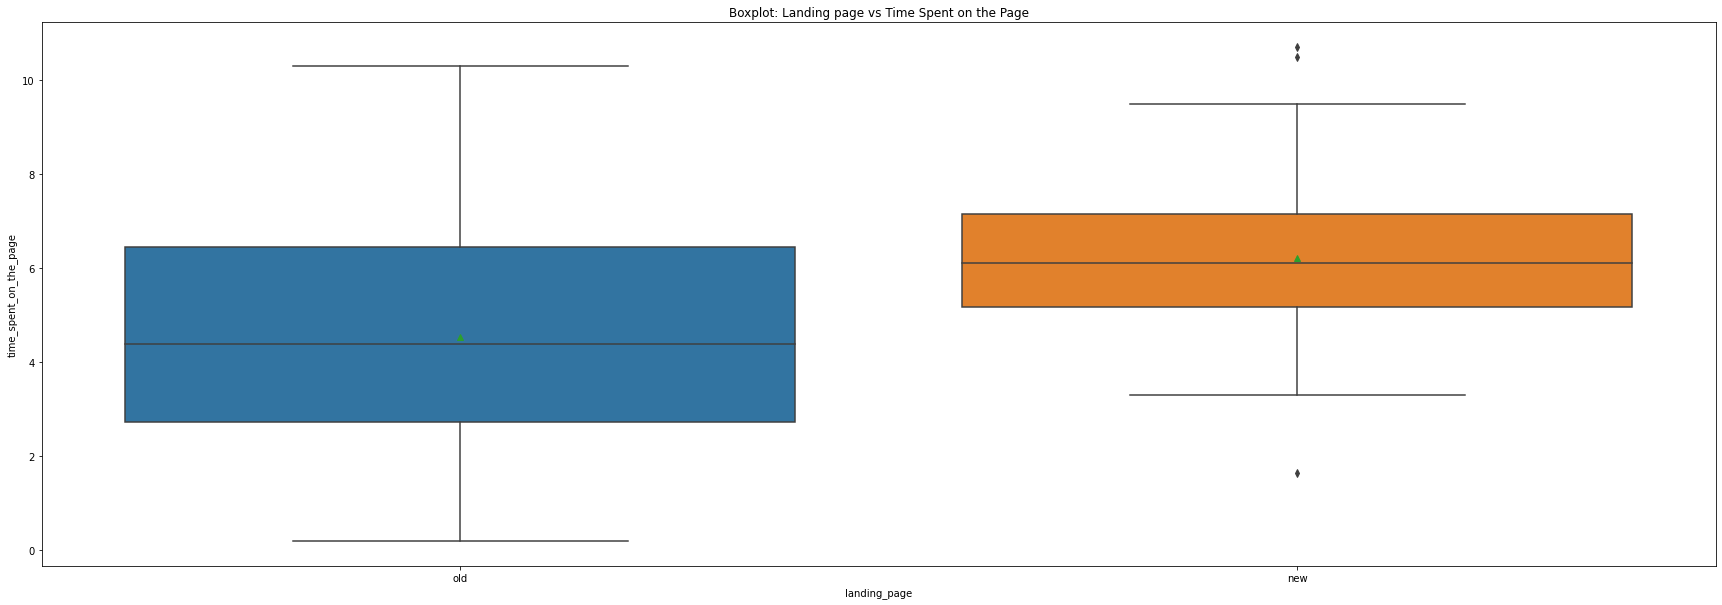

,count,mean,std,min,25%,50%,75%,max
landing_page,,,,,,,,
new,50.0,6.2232,1.817031,1.65,5.175,6.105,7.1600,10.71
old,50.0,4.5324,2.581975,0.19,2.720,4.380,6.4425,10.30


In [ ]:
# Boxplot of Landing page vs Time Spent on the Page
plt.figure(figsize=(30,10))
plt.title('Boxplot: Landing page vs Time Spent on the Page')
plt.ylabel('Frequency')
plt.xticks(np.arange(0,len(df['time_spent_on_the_page']+1),1))
sns.boxplot(data = df, x = 'landing_page', y = 'time_spent_on_the_page', showmeans = True)
plt.show()
df.groupby(['landing_page'])['time_spent_on_the_page'].describe()

####Observations:

* Based on the above graph, we can see the median is higher for users spending time on the new page compared to the old page. The average time spent is 6.22 for the new page and 4.53 for the old page. 
* The boxplots also show us a normal distribution.


### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2$ be the mean time spent on **new landing page** and **existing landing page** groups respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

### Step 2: Select Appropriate test

* Two Independent Sample T-test for Equality of Means
* One-tailed test 
* The population standard deviation is unknown

### Step 3: Decide the significance level

* The level of significance is 5%.

### Step 4: Collect and prepare data

In [ ]:
# Obtain the mean and std of time spent on the landing page
mean = df.groupby(['landing_page'])['time_spent_on_the_page'].mean()
std = df.groupby(['landing_page'])['time_spent_on_the_page'].std()

In [ ]:
print('The mean time spent on the new landing page is ' + str(mean[0]))
print('The mean time spent on the existing landing page is ' + str(mean[1]))
print('The standard deviation of time spent on the new landing page is ' + str(round(std[0],2)))
print('The standard deviation of time spent on the existing landing page is ' + str(round(std[1],2)))

The mean time spent on the new landing page is 6.2232
The mean time spent on the existing landing page is 4.5324
The standard deviation of time spent on the new landing page is 1.82
The standard deviation of time spent on the existing landing page is 2.58


####Observations:
* Assume that the population standard deviation is unequal from the sample standard deviation of the two groups

In [ ]:
# Query the data and obtain the values for time spent on the page categorized by new and old
new_group = df.loc[:,['landing_page',"time_spent_on_the_page"]]
x = new_group.query('landing_page == "new"')
time_spent_on_the_new_page = x.drop(labels = 'landing_page',axis=1)
y = new_group.query('landing_page == "old"')
time_spent_on_the_old_page = y.drop(labels = 'landing_page',axis=1)

### Step 5: Calculate the p-value

In [ ]:
# Import the function and calculate the p-value
from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind(time_spent_on_the_new_page, time_spent_on_the_old_page, equal_var = False, alternative = 'greater')
print('The p-value is', p_value[0])

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

* As the p-value (~.000139) is much less than the level of significance, we can reject the null hypothesis. Therefore, we do have enough significance to conclude that the mean time spent on the new landing page is greater than the existing landing page.

### Step 7:  Draw inference

* This is inline with the original observations during univariate and bivariate analysis that time spent on the new landing page is greater than the exisiting. This is significant.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

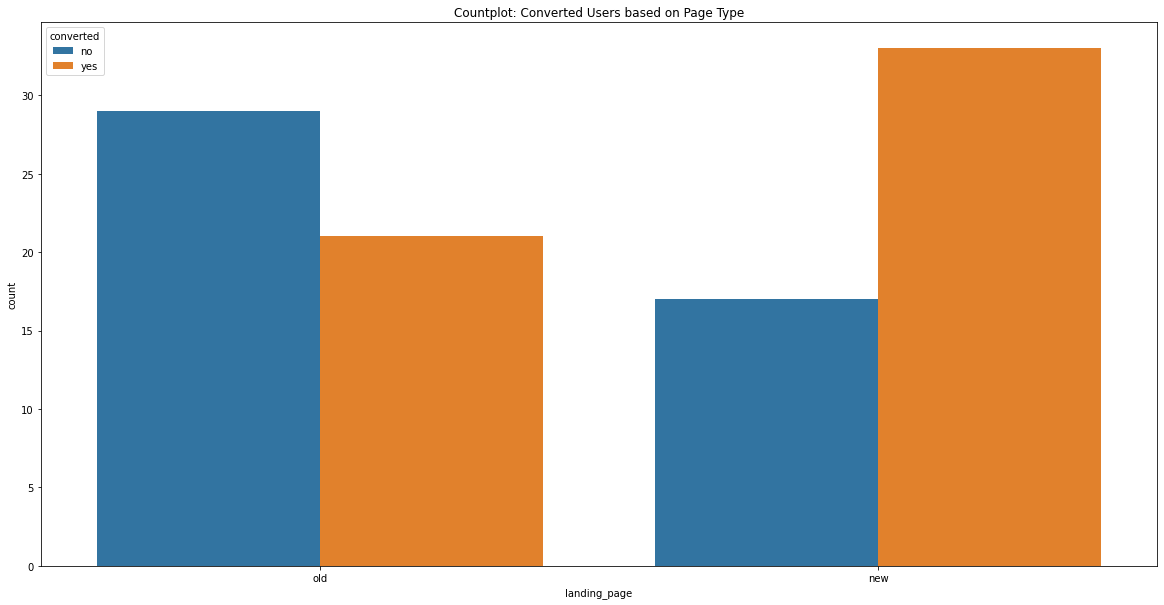

landing_page  converted
new           no           17
              yes          33
old           no           29
              yes          21
Name: converted, dtype: int64

In [ ]:
# Countplot for converted users based on page type
plt.figure(figsize=(20,10))
plt.title('Countplot: Converted Users based on Page Type')
plt.ylabel('Frequency')
sns.countplot(data = df, x = 'landing_page', hue = 'converted')
plt.show()
df.groupby(['landing_page','converted'])['converted'].count()

####Observations: 

* Based on the above graph, there are more users on the new page that were converted than users on the old page. 

### Step 1: Define the null and alternate hypotheses

Let $p_1,p_2$ be the proportions of users visting the **new landing page** and getting converted and users visiting the **old landing page** and getting converted respectively.

We will test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 > p_2$

### Step 2: Select Appropriate test

* Two Proportion Z-test
* One-tailed test

### Step 3: Decide the significance level

* The level of significance is 5%.

### Step 4: Collect and prepare data

In [ ]:
df.groupby(['group','converted'])[['converted']].count()

converted
group     converted           
control   no                29
          yes               21
treatment no                17
          yes               33

>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $

### Step 5: Calculate the p-value

In [ ]:
#Import the function and calculate the p-value
from statsmodels.stats.proportion import proportions_ztest

count = np.array([33, 21])
nobs = np.array([50, 50])

test_stat, p_value = proportions_ztest(count, nobs, alternative= 'larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Step 6: Compare the p-value with $\alpha$

* As the p-value (~.008) is less than the level of significance, we can reject the null hypothesis. Therefore, we do have enough significance to conclude that the conversion rate for users visiting the new page is greater than users visiting the existing page. 

### Step 7: Draw inference

* This is inline with the original observations during univariate and bivariate analysis that more users are converted on the new page compared to the old page. This is significant.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

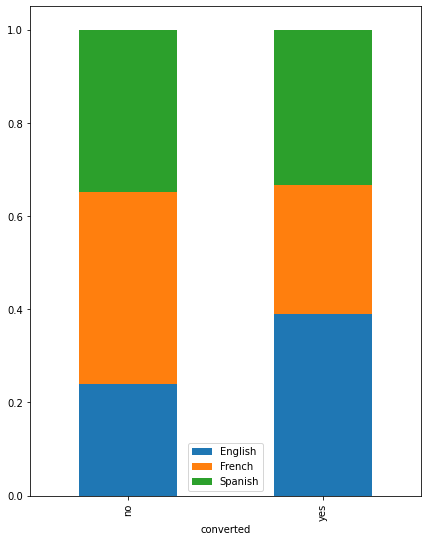

In [ ]:
ddd# Shows the relationship between users converted and language preferred
pd.crosstab(df['converted'], df['language_preferred'],normalize ='index').plot(kind='bar',figsize=(7,9), stacked=True)
plt.legend()
plt.show()

####Observations:

* Visually, those that were converted, the rate is greater for English. However, it doesn't look there is much dependence on the two variables.

### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis

>$H_0:$ Conversion is independent of preferred language.

against the alternate hypothesis

>$H_a:$ Conversion is dependent of preferred language.

### Step 2: Select Appropriate test

* Chi-Square Test for Independence

### Step 3: Decide the significance level

* The level of significance is 5%.

### Step 4: Collect and prepare data

In [ ]:
crosstab = pd.crosstab(df['converted'], df['language_preferred'])

### Step 5: Calculate the p-value

In [ ]:
#Import the function and calculate the p-value
from scipy.stats import chi2_contingency

p_value = chi2_contingency(crosstab)
print('The p-value is', p_value[1])

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

* As the p-value (~.21) is much greater than the level of significance, we can not reject the null hypothesis. Therefore, we do not have enough statistical significance to conclude that conversion and language preferred are related.

### Step 7: Draw inference

* This is inline with the observation made earlier for visual analysis. The conversion rate and language preferred are independent.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [ ]:
# Obtain just the data for users on the new landing page
df_1 = df[df['landing_page'] == 'new']

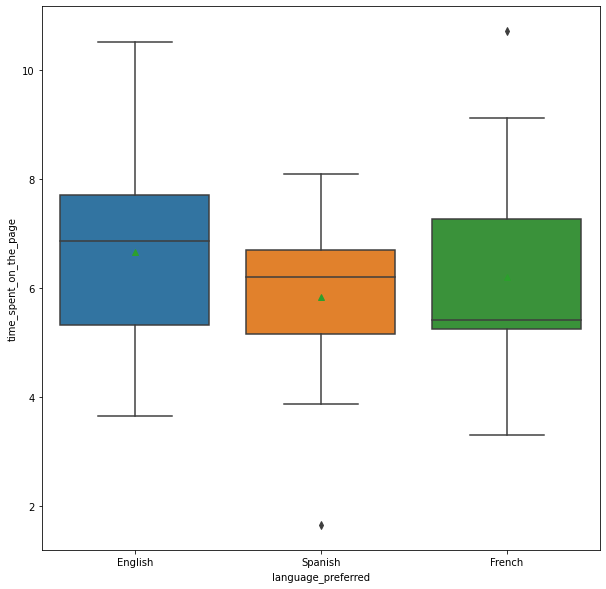

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

In [ ]:
# Boxplot of the time spent on the new page for language users
plt.figure(figsize=(10,10))
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_1)
plt.show()
df_1.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

####Observations:

* The mean time spent of users on the new page for various languages seems different. However, we must test our hypotheses. 

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the new page for  language users English, French, and Spanish respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one time spent is different from the rest.


### Step 2: Select Appropriate test

* One-way ANOVA Test 

### Step 3: Decide the significance level

* The level of significance is 5%.

### Step 4: Collect and prepare data

In [ ]:
# Obtain the time spent on the new page for English using query 
language_group = df.loc[:,['landing_page','time_spent_on_the_page','language_preferred']]
english_group= language_group.query('landing_page == "new" & language_preferred == "English"')
time_spent_on_the_new_page_english = english_group.drop(labels = ['landing_page','language_preferred'],axis=1)
time_spent_on_the_new_page_english.mean()

time_spent_on_the_page    6.66375
dtype: float64

In [ ]:
# Obtain the time spent on the new page for French using query 
french_group= language_group.query('landing_page == "new" & language_preferred == "French"')
time_spent_on_the_new_page_french = french_group.drop(labels = ['landing_page','language_preferred'],axis=1)
time_spent_on_the_new_page_french.mean()

time_spent_on_the_page    6.196471
dtype: float64

In [ ]:
# Obtain the time spent on the new page for Spanish using query 
spanish_group= language_group.query('landing_page == "new" & language_preferred == "Spanish"')
time_spent_on_the_new_page_spanish = spanish_group.drop(labels = ['landing_page','language_preferred'],axis=1)
time_spent_on_the_new_page_spanish.mean()

time_spent_on_the_page    5.835294
dtype: float64

In [ ]:
time_spent_on_the_new_page_all_languages = language_group.query('landing_page == "new"')

### Step 5: Calculate the p-value

In [ ]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(time_spent_on_the_new_page_english, time_spent_on_the_new_page_french, time_spent_on_the_new_page_spanish)
print('The p-value is ' + str(p_value[0]))

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

* As the p-value (~.43) is much greater than the level of significance, we can not reject the null hypothesis. Therefore, we do not have enough statistical significance to conclude that the time spent on new page for various language users is different.

### Multiple Comparison test (Tukey HSD)

 In order to identify which mean time spent on the new page is different from other groups, the null hypothesis is 

  > $𝐻_0: 𝜇_1=𝜇_2 \text{ and } 𝜇_1=𝜇_3 \text{ and } 𝜇_2=𝜇_3$

against the alternative hypothesis

 > $𝐻_a: 𝜇_1\neq𝜇_2 \text{ or } 𝜇_1\neq𝜇_3 \text{ or } 𝜇_2\neq𝜇_3$

In [ ]:
#import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = time_spent_on_the_new_page_all_languages['time_spent_on_the_page'], groups = time_spent_on_the_new_page_all_languages['language_preferred'], alpha = 0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
English  French  -0.4673 0.7259 -2.0035  1.069  False
English Spanish  -0.8285  0.401 -2.3647 0.7078  False
 French Spanish  -0.3612  0.816  -1.874 1.1516  False
-----------------------------------------------------


* As the p-values (refer to the p-adj column) for comparing the mean time spent on the new page is greater than the significance level for all languages, the null hypothesis for mean time spent on the new page for various language users cannot be rejected. 

 

### Step 7: Draw inference

* We can say that the mean for English, French, and Spanish are similar.

## Conclusion and Business Recommendations

**Conclusions:**

* Do the users spend more time on the new landing page than on the existing landing page? 
  * From the two independent sample t-test, we saw that the mean time spent on the new landing page is greater than the existing landing page.
* Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
 * From the two proportion z-test, we saw that the conversion rate for users visting the new page is greater than users visiting the existing page.
* Does the converted status depend on the preferred language?
 * From the chi-square test for independence, we saw that conversion status and preferred language are independent of each other. 
* Is the time spent on the new page the same for the different language users?
 * From the one-way ANOVA test and multiple comparision test, we saw that the mean time spent on the new page for different language users is mostly similar.

**Recommendations:**

* E-news Express should begin using the new landing page as it is effective for gathering new subscribers. 
* The company should keep investing in updating the design.
  * Exit Popups for when users are about to leave the site could prompt the user to input their email to subscribe.
  * Having a Hello Bar be displayed on the landing page may encourage more subscribers.
* Using the power of a content publishing platform such as Youtube or iTunes may help build a following and increase website traffic.
* Building a social media following on Instagram, Twitter, and Facebook can help direct users to the website. The more users that visit, the higher probability of subscription.
* It would be interesting to continue more A/B testing using the new page and another new page where there are discounts, promotions, and tailored content to users. From there we could continue our testing and see if these new added features lead to increased time spent on the page and have a higher conversion rate.
